----
----
----
## 訓練 | 驗證 | 測試數據分割程序

這通常也稱為“保留集”，因為你不應該根據最終測試集來調整參數，而應該僅用它來報告最終的預期性能。

0. 清理和調整 X 和 y 數據
1. 分割數據為訓練集、驗證集和測試集（適用於 X 和 y）
2. 對訓練數據（X_train）進行特徵縮放訓練
3. 縮放驗證數據（X_eval）
4. 創建模型
5. 在訓練數據（X_train）上訓練模型
6. 在驗證數據（X_eval）上評估模型（通過創建預測並與 y_eval 比較）
7. 根據需要調整參數並重複步驟5和6
8. 在測試集上獲取最終指標（這一步不能再回去調整參數！）

這個流程有助於確保模型在未見過的數據上有良好的泛化能力，並且避免了過度擬合。

### 使用 `cross_validate` 進行交叉驗證

`cross_validate` 函數與 `cross_val_score` 的不同之處在於以下兩點：

1. **允許指定多個評估指標**：
   - 您可以同時評估多個評分標準，而不僅僅是一個。

2. **返回一個包含多種信息的字典**：
   - 除了測試得分之外，還會返回訓練時間、評分時間（以及可選的訓練得分和已擬合的估計器）。

### 單一指標評估

當評分參數是一個字符串、可調用對象或 `None` 時，返回的字典將包含以下鍵：

- `['test_score', 'fit_time', 'score_time']`

### 多指標評估

當評分參數包含多個評分標準時，返回的字典將包含以下鍵：

- `['test_<scorer1_name>', 'test_<scorer2_name>', 'test_<scorer...>', 'fit_time', 'score_time']`

### 參數 `return_train_score`

默認情況下，`return_train_score` 設置為 `False` 以節省計算時間。如果需要在訓練集上評估得分，則需要將其設置為 `True`。



通過 `cross_validate` 函數，您可以更靈活地進行模型評估，獲得更多的評估指標和詳細的訓練、評分時間信息。

In [1]:
import pandas as pd
df = pd.read_csv("./Advertising.csv")
X = df.drop("sales",axis=1)
y = df["sales"]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_validate
ridge = Ridge(alpha=100)
scores = cross_validate(ridge,X_train,y_train,
                        scoring=["neg_mean_squared_error","neg_mean_absolute_error"],cv=5)
print(scores["test_neg_mean_squared_error"]*-1)
print(scores["test_neg_mean_absolute_error"]*-1)

[ 9.32552967  4.9449624  11.39665242  7.0242106   8.38562723]
[2.31243044 1.74653361 2.56211701 2.01873159 2.27951906]


### 網格搜索（Grid Search）
我們可以通過網格搜索來搜尋各種超參數組合。儘管許多線性模型非常簡單，甚至自帶專門的搜索版本來幫助你找到最佳參數組合，但這種網格搜索方法可以應用於 *任何* Scikit-learn 的模型。

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
import pandas as pd
df = pd.read_csv("./Advertising.csv")
X = df.drop("sales",axis=1)
y = df["sales"]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
from sklearn.linear_model import ElasticNet
param_grid ={"alpha":[0.1,1,5,10,50,100],
             "l1_ratio":[.1,.5,.7,.9,.95,.99,1,]}
base_estimator = ElasticNet()
from sklearn.model_selection import GridSearchCV
gird_search= GridSearchCV(estimator=base_estimator,
                          param_grid=param_grid,
                          scoring="neg_mean_squared_error",
                          cv=5)
gird_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error')

In [13]:
gird_search.best_params_

{'alpha': 0.1, 'l1_ratio': 1}

In [14]:
y_pred = gird_search.predict(X_test)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

2.3873426420874737

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import joblib


In [19]:
df = pd.read_csv("./Advertising.csv")
X = df[["TV","radio","newspaper"]]
y = df[["sales"]]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled,y_train)


LinearRegression()

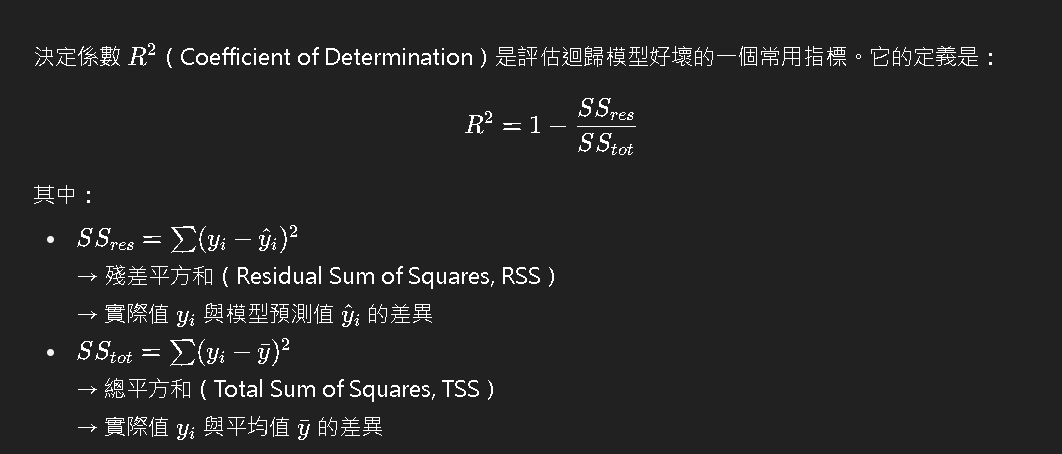

In [24]:
y_pred = model.predict(X_test_scaled)
print(X_test_scaled.shape,y_pred.shape)
print(y_test.shape,y_pred.shape)
mse = mean_squared_error(y_test,y_pred)
print(mse)
r2 = r2_score(y_test,y_pred)
print(r2)

(60, 3) (60, 1)
(60, 1) (60, 1)
3.79679723671522
0.8609466508230368


In [35]:
cv_score = cross_val_score(model,X_train_scaled,y_train,cv=5,scoring="neg_mean_squared_error")
print(cv_score)
print(-cv_score.mean())


[-2.77310355 -1.57714221 -2.41036868 -2.21679155 -4.87396954]
2.770275105537145


In [37]:
joblib.dump((model,scaler),"scaled_sles_prediction_model.pkl")

['scaled_sles_prediction_model.pkl']

### 準確率 (Accuracy)
表示模型正確預測的案例（真陽性和真陰性）占所有案例的比例。公式如下：
$$ \text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN} $$

# 計算及繪製混淆矩陣
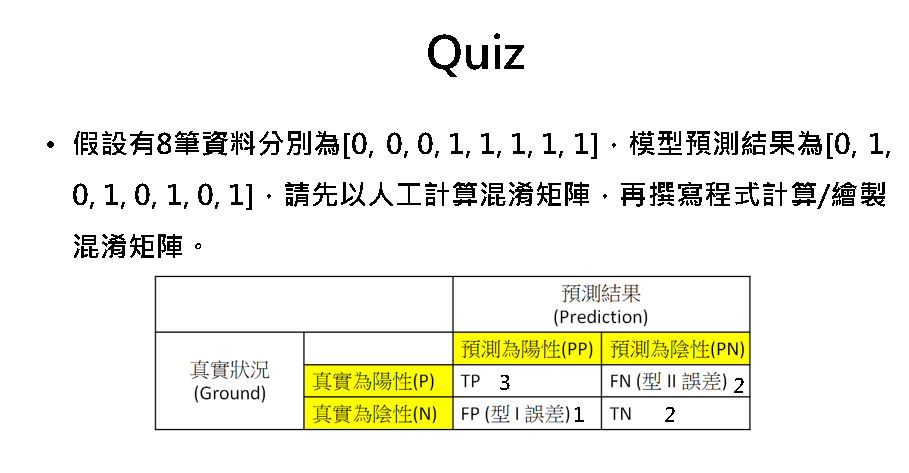

In [40]:
y_true = [0, 0, 0, 1, 1, 1, 1, 1]
y_pred = [0, 1, 0, 1, 0, 1, 0, 1]

## 計算混淆矩陣

In [44]:
from sklearn.metrics import confusion_matrix
"""
    0   1
0  TN  FP 
1  FN  TP
"""
confusion_matrix(y_true,y_pred)


array([[2, 1],
       [2, 3]], dtype=int64)

In [45]:
"""
    1   0
1  TP  FN 
0  FP  TN
"""
confusion_matrix(y_true,y_pred,labels=[1,0])

array([[3, 2],
       [1, 2]], dtype=int64)

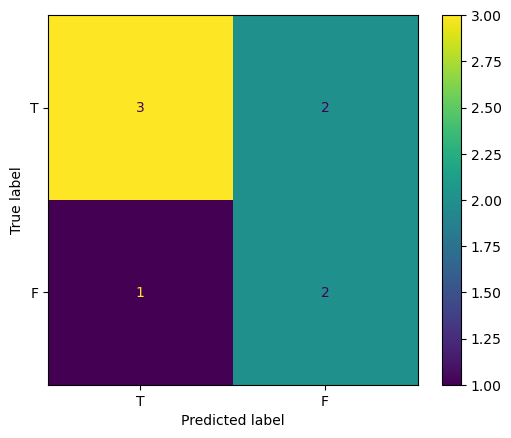

In [47]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
ConfusionMatrixDisplay.from_predictions(y_true,y_pred,labels=[1,0],display_labels=["T","F"])